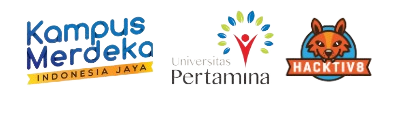

# ROP

Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Meet Our Member:** 
1. Andreas Dimas Christanto (PYTN-KS-08-017)
2. Elizabeth Bella Ruth S. (PYTN-KS-08-016)

# Overview

<p style='text-align: justify;'>
    Salah satu upaya yang dapat dilakukan untuk menurunkan biaya pengeboran adalah dengan meningkatkan laju 
penetrasi pengeboran. Laju penetrasi pengeboran atau rate of penetration (ROP) merupakan kecepatan mata bor 
memecah formasi di bawahnya untuk memperdalam lubang sumur dan mencapai kedalaman target. Model 
tradisional (physics-based) model menggunakan korelasi matematis antar parameter pengeboran tanpa 
bergantung pada basis data secara langsung. Persamaan prediksi yang dikembangkan oleh Burgoyne dan Young 
(1974) merupakan metode standar yang digunakan pada industri. Pada Burgoyne and Young Model (BYM) terdapat 
8 parameter pengeboran, diantaranya adalah: 1) formation strength, 2) formation compaction, 3) pore pressure, 4) 
differential pressure, 5) weight-on-bit, 6) rotary drilling speed, 7) drill-bit tooth wear, dan 8) parameter hidrolika 
dari jet pada bit. Selain metode prediksi ROP secara analitik menggunakan BYM, Barbosa dkk. juga merangkum 
aplikasi evaluasi berbasis data seperti machine learning untuk memprediksikan ROP (Barbosa et al., 2019)

<p style='text-align: justify;'>

    ▪ FORMATION, merupakan nama formasi batuan yang ditembus pada kedalaman tertentu
    ▪ TMD, merupakan true measured depth (meter)
    ▪ TVD, merupakan true vertical depth (meter)
    ▪ ROP, merupakan rate of penetration atau laju penetrasi (meter/jam)
    ▪ WOB, merupakan weight on bit (ton)
    ▪ FR, merupakan laju alir lumpur (gallon/menit)
    ▪ SPP, merupakan stand-pipe pressure (psi)
    ▪ RPM, merupakan angular speed dari rotasi drill string (rpm)
    ▪ TQ, merupakan bacaan torque (pound-foot)
    ▪ MW IN, merupakan densitas lumpur yang dipompakan melalui drill string (pound/gallon)
# Objective

Pada kasus ini, tujuan atau objective yang ingin dicapai antara lain sebagai berikut: 
1. Parameter yg penting buat ROP prediction
2. Model yg baik buat nentyin ROP
3. consider itu smur 5 sm 6 itu kararteristik
    
# Import Library 


# Note Upgrade

- [ ] Spearman dipemilihan sumur dipilih yang besar angkanya mutlak (coba cek udh bener belum pemilihannya yg non sumur well 2 blm? 
- [ ] Feature TMD didrop coba hasilnya gimana dan SPP itu mirip gak sih yg ngomongin hidrostatis 
- [ ] Outlier kalo ngga di buang gimana?
- [ ] Pakai standarisasi / scaler disetiap step
- [ ] Kurva learning curve yg n_estimator, max_feature, max_depth ditambahin ke paper
- [ ] Baca two way pdp
- [ ] Misal ada 8 sumur yg 1 sumur dengan hubungan varibel terbagus dan 1 terjelek kemudian di blind dan dibandingin score yg korelasi bagus dan korelasi jelek. (2 sumur blond dan 6 sumur training) 
- [ ] Sb y depth kebalik, sb x nya rop dan bandingin data real dan data prediksi buat pelaporan dan lebih analisa lebih lanjut yg jelek itu formasi yng mana dan formasi mana yg susah untuk diprediksikan dengan pakai visualisasi. 


In [1]:
# Import library pandas dan numpy untuk dataframe
import pandas as pd 
import numpy as np 

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import plotly.express as px

## Import Library untuk analisis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

pd.options.display.max_rows = None 
pd.options.display.max_columns = None

import pickle

# Data Loading 

In [2]:
data = pd.read_csv('ROP_WELL_DATA.csv')
data.head()


FORMATION  TMD  WOB    FR    SPP  RPM      TQ   MW IN   ROP
0  SENONIAN ANHYDRITIC  475    0  690.7  2325   63     0.0  10.523  22.0
1  SENONIAN ANHYDRITIC  476    0  718.0  2778   70     0.0  10.985  24.1
2  SENONIAN ANHYDRITIC  477    0  718.5  2774   69  1242.0  10.978  55.2
3  SENONIAN ANHYDRITIC  478   10  703.4  2650  118  3386.0  11.007  41.3
4  SENONIAN ANHYDRITIC  479   10  703.9  2654  106  3923.0  11.010  68.9

In [3]:
data.shape

(10609, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FORMATION  10609 non-null  object 
 1   TMD        10609 non-null  int64  
 2   WOB        10609 non-null  int64  
 3   FR         10609 non-null  float64
 4   SPP        10609 non-null  int64  
 5   RPM        10609 non-null  int64  
 6   TQ         10609 non-null  float64
 7   MW IN      10609 non-null  float64
 8   ROP        10609 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 746.1+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
Lenc = LabelEncoder()

data["FORMATION"] = Lenc.fit_transform(data["FORMATION"])

In [6]:
data.describe()

FORMATION           TMD           WOB           FR            SPP  \
count  10609.000000  10609.000000  10609.000000  10609.000000  10609.000000   
mean       6.058912   1458.926195     13.004242    765.106193   3249.158168   
std        3.901069    604.098250     19.321935    124.804193    622.523751   
min        0.000000    428.000000      0.000000      0.000000    547.000000   
25%        3.000000    937.000000      8.000000    747.200000   2822.000000   
50%        6.000000   1447.000000     11.000000    782.200000   3409.000000   
75%        9.000000   1978.000000     13.000000    823.800000   3744.000000   
max       13.000000   2595.000000    160.000000   1741.300000   4416.000000   

                RPM            TQ         MW IN           ROP  
count  10609.000000  10609.000000  10609.000000  10609.000000  
mean     274.563672   8952.593081     10.885173     82.697210  
std      940.674705   3035.585260      0.300237     37.144811  
min       57.000000      0.000000      8.250000      3.100000  
25%      142.000000   6985.000000     10.856000     56.000000  
50%      151.000000   9194.000000     11.000000     78.300000  
75%      165.000000  11161.000000     11.000000    105.500000  
max    13851.000000  19822.000000     12.049000    309.100000

In [7]:
#Mengecek missing value 
data.isnull().sum()

FORMATION    0
TMD          0
WOB          0
FR           0
SPP          0
RPM          0
TQ           0
MW IN        0
ROP          0
dtype: int64

<AxesSubplot:>

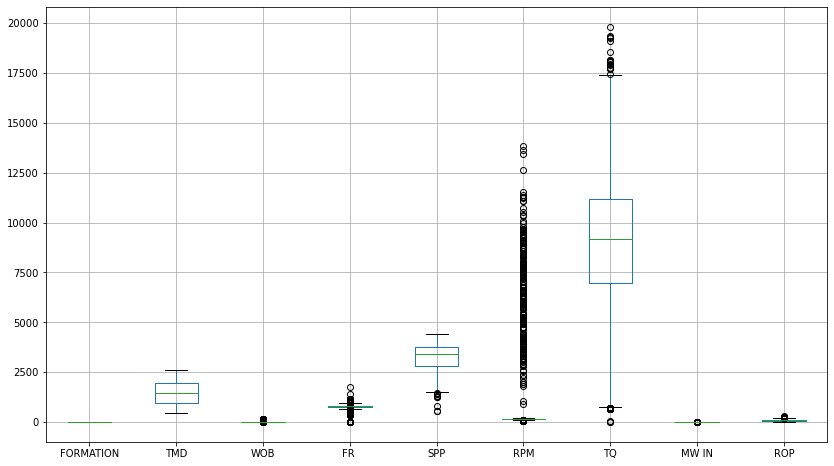

In [8]:
plt.figure(figsize=(14,8))
data.boxplot()

# Data Cleaning 

In [9]:
df1 = pd.read_csv('ROP_NON_W1.csv')
df2 = pd.read_csv('ROP_NON_W2.csv')
df3 = pd.read_csv('ROP_NON_W3.csv')
df4 = pd.read_csv('ROP_NON_W4.csv')
df5 = pd.read_csv('ROP_NON_W5.csv')
df6 = pd.read_csv('ROP_NON_W6.csv')

Keterangan 
- df1 merupakan dataset tanpa sumur 1
- df2 merupakan dataset tanpa sumur 2
- df3 merupakan dataset tanpa sumur 3
- df4 merupakan dataset tanpa sumur 4
- df5 merupakan dataset tanpa sumur 5
- df6 merupakan dataset tanpa sumur 6

In [10]:
Well_1 = pd.read_csv('SUMUR_1.csv')
Well_2 = pd.read_csv('SUMUR_2.csv')
Well_3 = pd.read_csv('SUMUR_3.csv')
Well_4 = pd.read_csv('SUMUR_4.csv')
Well_5 = pd.read_csv('SUMUR_5.csv')
Well_6 = pd.read_csv('SUMUR_6.csv')



In [11]:
df1["FORMATION"] = Lenc.fit_transform(df1["FORMATION"])
df2["FORMATION"] = Lenc.fit_transform(df2["FORMATION"])
df3["FORMATION"] = Lenc.fit_transform(df3["FORMATION"])
df4["FORMATION"] = Lenc.fit_transform(df4["FORMATION"])
df5["FORMATION"] = Lenc.fit_transform(df5["FORMATION"])
df6["FORMATION"] = Lenc.fit_transform(df6["FORMATION"])

In [12]:
df1 = df1.drop(['TMD'],axis=1)
df2 = df2.drop(['TMD'],axis=1)
df3 = df3.drop(['TMD'],axis=1)
df4 = df4.drop(['TMD'],axis=1)
df5 = df5.drop(['TMD'],axis=1)
df6 = df6.drop(['TMD'],axis=1)

ada 6 sumur ya ini !

## Memilih data set yang mana yang paling baik  

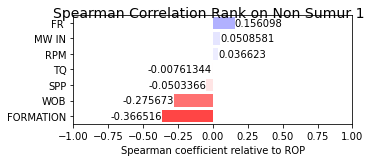

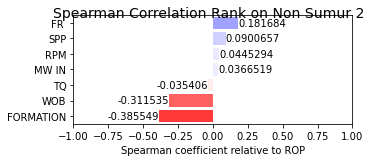

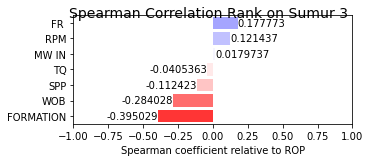

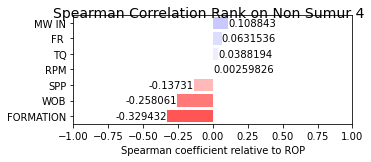

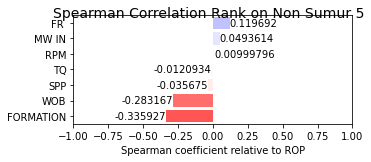

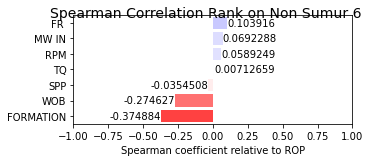

In [13]:
### Sumur 1
rank_spear_1 = df1.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_1.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 1', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_1.values,
    y=rank_spear_1.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur1 = plt.show()

### Sumur 2
rank_spear_2 = df2.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_2.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 2', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_2.values,
    y=rank_spear_2.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur2 = plt.show()

### Sumur 3
rank_spear_3 = df3.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_3.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Sumur 3', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_3.values,
    y=rank_spear_3.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur3 = plt.show()

### Sumur 4
rank_spear_4 = df4.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_4.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 4', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_4.values,
    y=rank_spear_4.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur4 = plt.show()

### Sumur 5
rank_spear_5 = df5.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_5.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 5', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_5.values,
    y=rank_spear_5.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur5 = plt.show()

### Sumur 6
rank_spear_6 = df6.corr('spearman').loc[:,'ROP'].drop('ROP').sort_values(ascending=False)

cmap = mpl.cm.get_cmap('seismic_r')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_6.values))

fig, ax = plt.subplots(figsize=(5,2))
fig.suptitle('Spearman Correlation Rank on Non Sumur 6 ', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_6.values,
    y=rank_spear_6.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
nonsumur6 = plt.show()



Jadi kita memilih data tanpa sumur 2 (df2) menjadi data set kita kemudian data sumur 2 untuk blind test

In [14]:
df = pd.read_csv('ROP_NON_W2W6.csv')
 



In [15]:
blind1 = Well_2
blind2 = Well_6

In [16]:
df["FORMATION"] = Lenc.fit_transform(df["FORMATION"])
df.head()

FORMATION  TMD  WOB    FR    SPP  RPM      TQ   MW IN   ROP
0          9  475    0  690.7  2325   63     0.0  10.523  22.0
1          9  476    0  718.0  2778   70     0.0  10.985  24.1
2          9  477    0  718.5  2774   69  1242.0  10.978  55.2
3          9  478   10  703.4  2650  118  3386.0  11.007  41.3
4          9  479   10  703.9  2654  106  3923.0  11.010  68.9

In [17]:
df.tail()

FORMATION   TMD  WOB    FR    SPP  RPM       TQ   MW IN   ROP
5780          5  2526   14  747.4  4053  194  10971.0  10.878  71.1
5781          5  2527   14  747.2  4053  193  10854.0  10.899  84.7
5782          5  2528   15  747.3  4054  191  11444.0  10.862  43.6
5783          5  2529   15  746.6  4056  192  10357.0  10.852  64.1
5784          5  2530   19  747.0  4052  194   9077.0  10.861  15.3

In [18]:
df.describe()

FORMATION          TMD          WOB          FR           SPP  \
count  5785.000000  5785.000000  5785.000000  5785.000000  5785.000000   
mean      4.538116  1365.468280    14.553155   766.030164  3241.293863   
std       3.215084   582.781929    25.879488   157.800087   678.126711   
min       0.000000   428.000000     0.000000     0.000000   547.000000   
25%       2.000000   856.000000     8.000000   757.900000  2777.000000   
50%       4.000000  1338.000000    10.000000   806.800000  3357.000000   
75%       7.000000  1820.000000    12.000000   828.600000  3802.000000   
max      11.000000  2530.000000   160.000000  1741.300000  4416.000000   

                RPM            TQ        MW IN          ROP  
count   5785.000000   5785.000000  5785.000000  5785.000000  
mean     381.135004   8391.708384    10.878266    80.217027  
std     1263.997345   3200.309465     0.229294    35.254052  
min       61.000000      0.000000     8.850000     3.100000  
25%      146.000000   6328.000000    10.878000    55.100000  
50%      158.000000   8551.000000    11.000000    75.400000  
75%      171.000000  10561.000000    11.000000    99.800000  
max    13851.000000  19822.000000    11.208000   309.100000

In [19]:
df.shape

(5785, 9)

In [20]:
df.isnull().sum()

FORMATION    0
TMD          0
WOB          0
FR           0
SPP          0
RPM          0
TQ           0
MW IN        0
ROP          0
dtype: int64

In [21]:
df.corr('spearman')

FORMATION       TMD       WOB       FR        SPP       RPM  \
FORMATION   1.000000 -0.262406  0.265487  0.085471 -0.177225 -0.073314   
TMD        -0.262406  1.000000  0.082339 -0.086387  0.756986  0.408499   
WOB         0.265487  0.082339  1.000000 -0.191190  0.173942  0.225673   
FR          0.085471 -0.086387 -0.191190  1.000000 -0.050148 -0.224536   
SPP        -0.177225  0.756986  0.173942 -0.050148  1.000000  0.339575   
RPM        -0.073314  0.408499  0.225673 -0.224536  0.339575  1.000000   
TQ          0.052562  0.351669  0.346432  0.193250  0.272419  0.011750   
MW IN      -0.337613  0.457764 -0.111538 -0.107528  0.336857  0.205053   
ROP        -0.372223  0.007949 -0.337551  0.173807  0.156171  0.035873   

                 TQ     MW IN       ROP  
FORMATION  0.052562 -0.337613 -0.372223  
TMD        0.351669  0.457764  0.007949  
WOB        0.346432 -0.111538 -0.337551  
FR         0.193250 -0.107528  0.173807  
SPP        0.272419  0.336857  0.156171  
RPM        0.011750  0.205053  0.035873  
TQ         1.000000  0.104666 -0.032197  
MW IN      0.104666  1.000000  0.054867  
ROP       -0.032197  0.054867  1.000000

<AxesSubplot:>

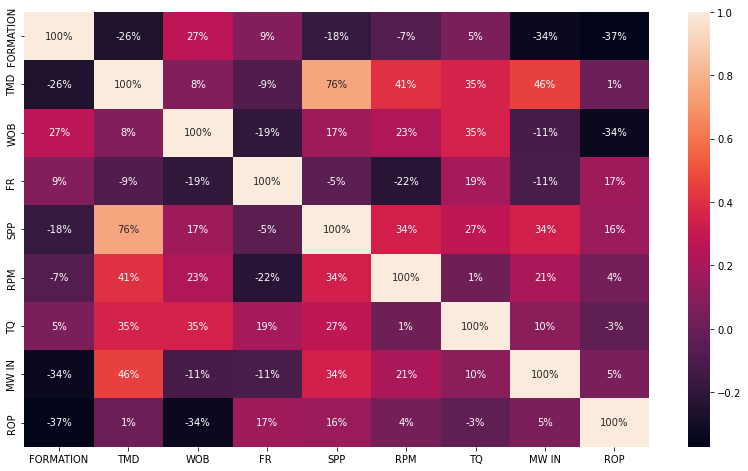

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr('spearman'), annot=True, fmt='.0%')

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\

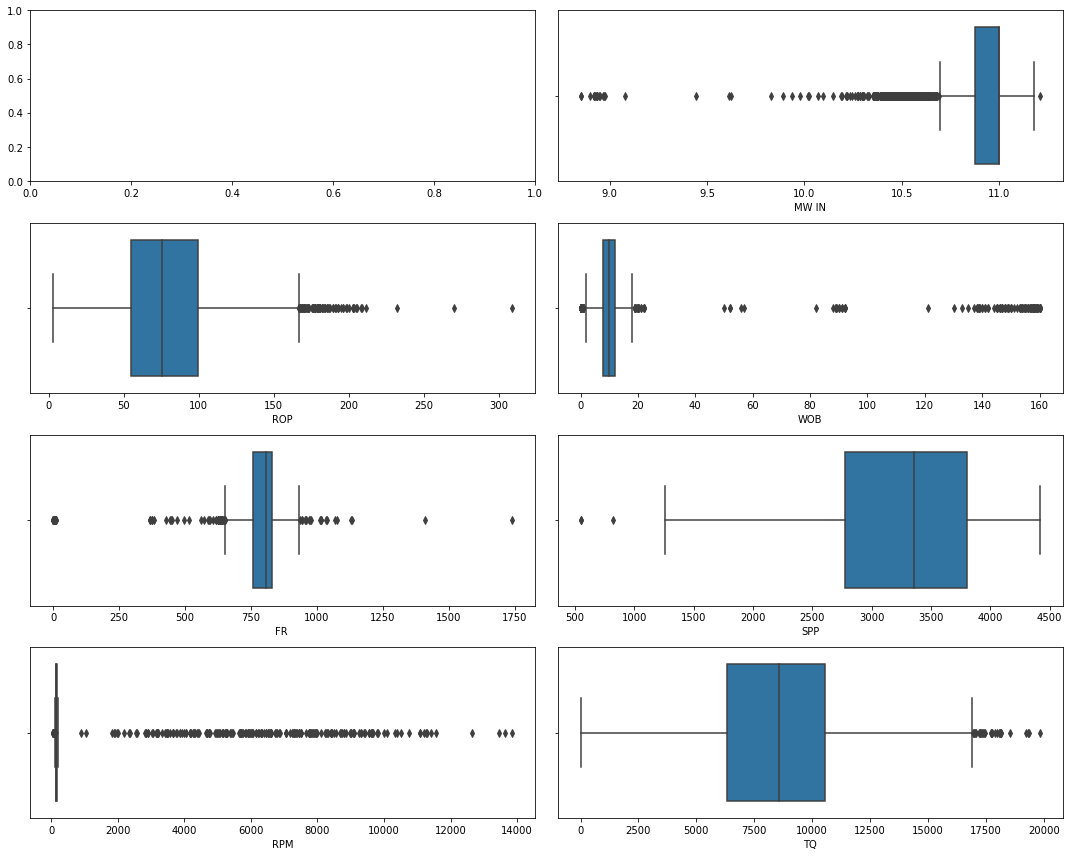

In [23]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
sns.boxplot(df['MW IN'], ax=axes[0,1])
sns.boxplot(df['ROP'], ax=axes[1,0])
sns.boxplot(df['WOB'], ax=axes[1,1])
sns.boxplot(df['FR '], ax=axes[2,0])
sns.boxplot(df['SPP'], ax=axes[2,1])
sns.boxplot(df['RPM'], ax=axes[3,0])
sns.boxplot(df['TQ'], ax=axes[3,1])


plt.tight_layout()
plt.show()

# Lower Limit
q1 = df.quantile(0.25)
# Upper Limit
q3 = df.quantile(0.75)

Iqr = q3-q1
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":q3+1.5*Iqr})
# Lower Limit
low_limit = pd.DataFrame({"Lower Limit":q1-1.5*Iqr})

# apply into datafrlow_limit
data_quartile = pd.concat([up_limit, low_limit], axis=1)
data_quartile

C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISMANTO\

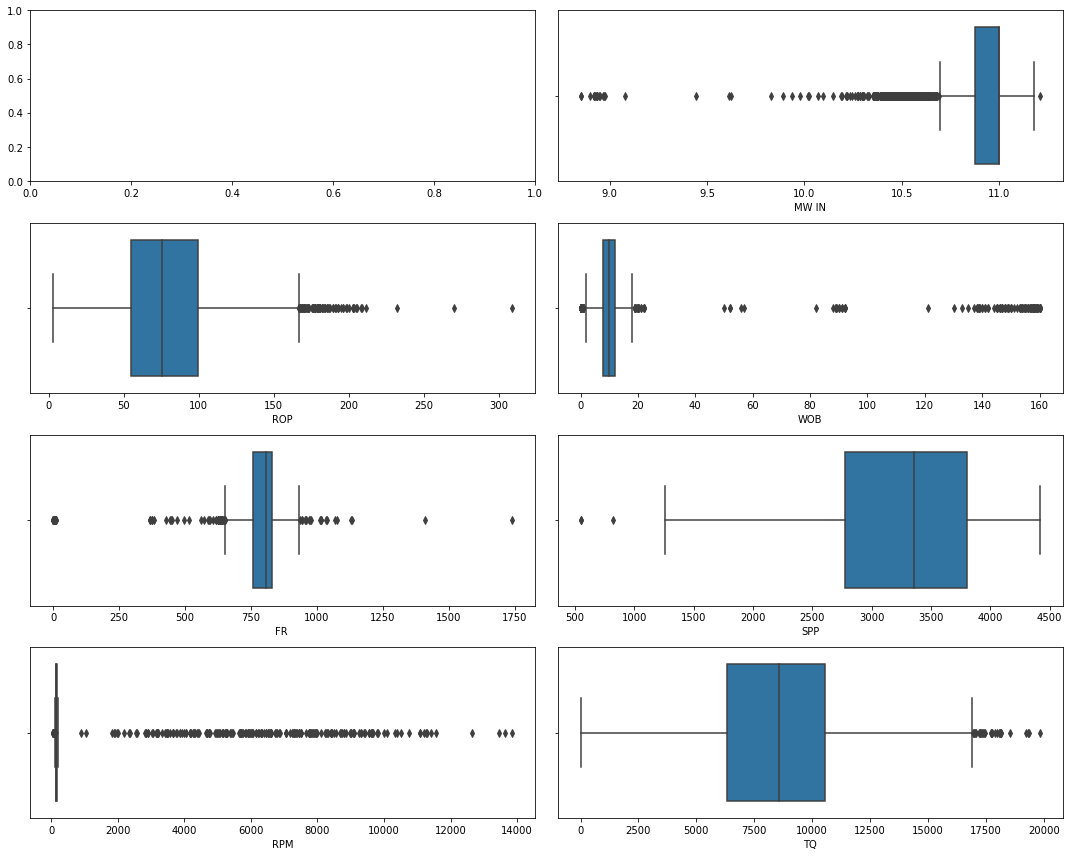

In [24]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

sns.boxplot(df['ROP'], ax=axes[1,0])
sns.boxplot(df['WOB'], ax=axes[1,1])
sns.boxplot(df['FR '], ax=axes[2,0])
sns.boxplot(df['SPP'], ax=axes[2,1])
sns.boxplot(df['RPM'], ax=axes[3,0])
sns.boxplot(df['TQ'], ax=axes[3,1])
sns.boxplot(df['MW IN'], ax=axes[0,1])
plt.tight_layout()
plt.show()

In [25]:
# outlier hilang 

# Exploration Data and Analysis (EDA)
### Explore Data Statistik 


In [26]:
df.describe()

FORMATION          TMD          WOB          FR           SPP  \
count  5785.000000  5785.000000  5785.000000  5785.000000  5785.000000   
mean      4.538116  1365.468280    14.553155   766.030164  3241.293863   
std       3.215084   582.781929    25.879488   157.800087   678.126711   
min       0.000000   428.000000     0.000000     0.000000   547.000000   
25%       2.000000   856.000000     8.000000   757.900000  2777.000000   
50%       4.000000  1338.000000    10.000000   806.800000  3357.000000   
75%       7.000000  1820.000000    12.000000   828.600000  3802.000000   
max      11.000000  2530.000000   160.000000  1741.300000  4416.000000   

                RPM            TQ        MW IN          ROP  
count   5785.000000   5785.000000  5785.000000  5785.000000  
mean     381.135004   8391.708384    10.878266    80.217027  
std     1263.997345   3200.309465     0.229294    35.254052  
min       61.000000      0.000000     8.850000     3.100000  
25%      146.000000   6328.000000    10.878000    55.100000  
50%      158.000000   8551.000000    11.000000    75.400000  
75%      171.000000  10561.000000    11.000000    99.800000  
max    13851.000000  19822.000000    11.208000   309.100000

### Explore Transport Name

In [27]:
#Membuat variabel data formation berisi total data dari kolom formatio 
df_formation = data['FORMATION'].value_counts()
df_formation

3     2239
0     1356
9     1286
8     1013
4      964
11     851
6      750
13     503
12     489
7      411
10     340
5      263
1      120
2       24
Name: FORMATION, dtype: int64

<AxesSubplot:>

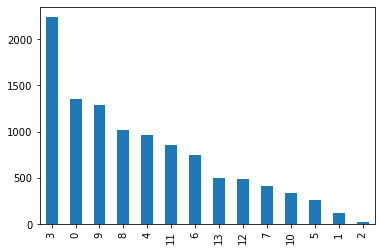

In [28]:
df_formation.plot(kind='bar')

In [29]:
#Membuat variabel data rop berisi total data dari kolom ROP
df_rop = data['ROP'].value_counts()
df_rop

67.4     32
82.2     31
69.5     29
64.5     27
56.3     26
71.0     26
68.1     25
92.1     25
90.5     24
73.0     24
54.7     24
71.4     24
90.4     24
64.4     24
75.3     23
50.3     22
73.1     22
67.8     22
79.7     21
66.9     21
74.7     21
78.1     21
77.3     21
82.0     21
75.4     20
63.2     20
65.6     20
82.3     20
73.5     20
66.2     20
72.5     20
67.3     20
69.4     19
71.1     19
82.1     19
56.4     19
45.2     19
79.8     19
67.7     19
66.3     19
60.2     19
81.4     18
55.0     18
90.6     18
69.2     18
80.2     18
79.3     18
75.1     18
80.1     18
73.3     18
44.8     18
63.9     18
77.1     18
101.4    18
84.2     17
62.8     17
60.0     17
64.3     17
47.6     17
81.5     17
84.5     17
76.6     17
75.2     17
50.1     17
79.1     17
54.4     17
51.2     17
66.1     17
87.9     17
100.5    17
62.5     17
56.1     17
49.9     17
53.2     17
90.2     17
92.9     17
71.2     17
102.3    17
51.4     17
79.2     17
91.3     16
73.2     16
92.7     16
60.1

# Data Preprocessing

 **Feature matrix** `x` \
 **Target matrix** `y`

In [30]:
y = df['ROP']
X = df.drop(['ROP'],axis=1)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FORMATION  5785 non-null   int32  
 1   TMD        5785 non-null   int64  
 2   WOB        5785 non-null   int64  
 3   FR         5785 non-null   float64
 4   SPP        5785 non-null   int64  
 5   RPM        5785 non-null   int64  
 6   TQ         5785 non-null   float64
 7   MW IN      5785 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 339.1 KB


In [32]:
X.columns

Index(['FORMATION', 'TMD', 'WOB', 'FR ', 'SPP', 'RPM', 'TQ', 'MW IN'], dtype='object')

<AxesSubplot:>

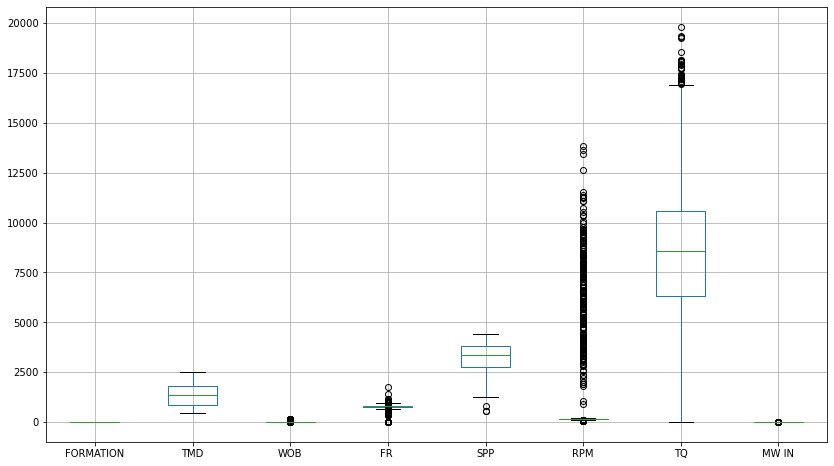

In [33]:
plt.figure(figsize=(14,8))
X.boxplot()

## Data splitting


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
X_test.describe()

FORMATION          TMD         WOB          FR           SPP  \
count  579.00000   579.000000  579.000000   579.000000   579.000000   
mean     4.51468  1384.953368   13.303972   773.727116  3217.322971   
std      3.16026   588.574320   23.326348   144.259966   686.905927   
min      0.00000   428.000000    0.000000     3.000000  1259.000000   
25%      2.00000   869.500000    7.000000   761.250000  2767.500000   
50%      4.00000  1373.000000   10.000000   808.400000  3325.000000   
75%      7.00000  1840.000000   12.000000   829.150000  3802.500000   
max     11.00000  2527.000000  160.000000  1410.900000  4356.000000   

               RPM            TQ       MW IN  
count   579.000000    579.000000  579.000000  
mean    310.307427   8364.687737   10.875052  
std     995.048547   3106.819822    0.217826  
min      69.000000     47.000000    8.970000  
25%     145.000000   6527.500000   10.873500  
50%     158.000000   8291.000000   11.000000  
75%     171.000000  10521.500000   11.000000  
max    9605.000000  16567.000000   11.141000

<AxesSubplot:>

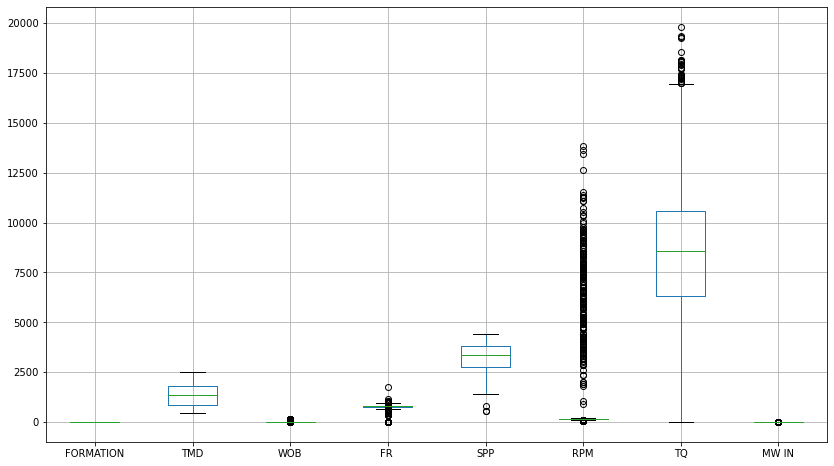

In [36]:
plt.figure(figsize=(14,8))
X_train.boxplot()

### Standardization


In [37]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler instance
scaler = StandardScaler()

# train the scaler to fit X_train
scaler.fit(X_train)

# create transformed X_train_scaled
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

<AxesSubplot:>

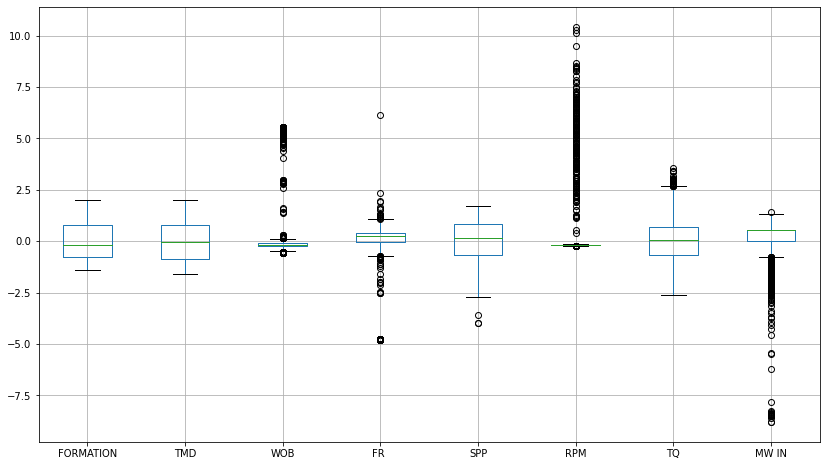

In [38]:
plt.figure(figsize=(14,8))
X_train_scaled.boxplot()

## MODELING 
### RANDOM FOREST REGRESSOR

In [39]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with n_estimators trees
rf = RandomForestRegressor()

# train the model on the training data
rf.fit(X_train, y_train)

# predict performance using train and test set
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.8056693468275979
0.9722363871233066


In [41]:
X_train

FORMATION   TMD  WOB     FR    SPP    RPM       TQ   MW IN
2608          2  1412    4   778.8  2778    135   9351.0  11.000
569           3  1044   10   635.2  2547    159  10394.0  11.000
2367          0  1171    6   845.5  2911    153   8145.0  11.000
26            9   501    6   822.9  3531    145   6209.0  11.011
1280          2  1755   11   713.9  3719    167   7601.0  11.000
1601          9   644  156     6.0  1837   8395    679.6  10.415
1726          8   530    4   814.8  2062    115   9408.0  10.400
3943         10   689    8   849.0  2867    138   4746.0  10.465
2438          0  1242    5   804.3  2743    117   6177.0  11.000
871           0  1346   12   753.5  3796    177   9071.0  11.000
4004         10   750   11   852.0  2969    151  11986.0  11.152
4749          2  1495    8   849.5  3986    162   8939.0  10.802
2175          3   979    6   844.3  2632    158   5148.0  11.000
2411          0  1215    2   837.4  2900    151   3105.0  11.000
145           9   620    9   835.8  3655    116   7123.0  10.800
5292          6  2038   10   795.9  4032    155   9338.0  10.955
3905         10   651   11   824.2  2665    133  11108.0  10.517
2400          0  1204    6   811.6  2740    161   9916.0  11.000
398          11   873    6   766.4  3442    176   3939.0  11.000
3491          4  2295   10   813.9  3781    193  10660.0  11.000
1026          2  1501    3   728.8  3906    172   4261.0  11.000
4714          2  1460   12   849.1  3946    159  10037.0  11.024
2246          3  1050    7   816.1  2569    155   5842.0  11.000
5364          6  2110   11   788.9  4097    133   9267.0  11.016
42            9   517    8   835.5  3614    142   3373.0  11.028
5226          7  1972   11   803.2  4091    152   9310.0  10.969
4331          3  1077    6   827.2  3175    114   4432.0  10.947
5447          6  2193   11   803.2  4319    165  11690.0  10.986
3988         10   734   11   859.9  3021    147  11620.0  11.085
1495          9   538  158     5.0  1710   6291    690.4  10.646
165           9   640    6   833.1  3639    122   4528.0  10.800
4825          2  1571   13   883.0  4332    161  10512.0  10.988
1437          9   480   92     5.0  1882   4733    739.3  10.778
5682          4  2428   14   747.7  4001    159   9130.0  10.955
1688          8   492   10   827.5  2127    146   8025.0  10.400
1257          2  1732   11   700.2  3584    166  10353.0  11.000
2429          0  1233    7   813.1  2786    105  13990.0  11.000
5744          5  2490   13   768.8  4051    189   5205.0  10.888
4948          2  1694    8   848.0  4121    158   9160.0  10.804
1384          2  1859    8   685.9  3679    172  11869.0  11.000
1316          2  1791    7   730.9  3971    174   7401.0  11.000
1507          9   550  159     2.0  1712   1059    691.1  10.396
507           3   982   10   639.4  2579    143  11596.0  11.000
1047          2  1522   11   668.1  3408    177   9812.0  11.000
591           3  1066   11   635.6  2586    152   6395.0  11.000
2579          2  1383    4   824.5  3060    136   5470.0  11.000
1457          9   500  140     4.0  1895   4169    738.6  10.831
1160          2  1635   13   703.5  3563    160  11373.0  11.000
3228          6  2032   11   822.9  3121    175  12082.0  11.000
1764          8   568    9   827.9  2006    119   8077.0  10.400
4299          3  1045    5   827.1  3102    152   3491.0  10.856
2029         11   833   10   849.0  2362    162  12750.0  10.500
3707          5   453   11   768.8  2045    117   5541.0  10.497
5140          7  1886   11   776.3  3874    141  10151.0  10.979
3695          5   441    5   774.4  2045     87   5194.0  10.668
5030          7  1776    9   793.1  3880    159   8744.0  10.955
4584          1  1330   11   752.7  2948    144   9309.0  10.930
991           2  1466    9   738.1  3831    171   7961.0  11.000
4953          2  1699    9   849.3  4134    166   7836.0  10.876
152           9   627   12   835.5  3660    141   8989.0  10.800
2372          0  1176    6   847.7  2915 

In [42]:
#from sklearn.metrics import accuracy_score

# score on training set (seen by model during training)
#accuracy_score(y_train, y_pred_train)

In [43]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with n_estimators trees
rf = RandomForestRegressor()

# train the model on the training data
rf.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
# predict performance using train and test set
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

C:\Users\KRISMANTO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5206, 8), (579, 8), (5206,), (579,))

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.802817999431026
0.971551022142661


In [46]:
#X_test

In [47]:
#X_test

In [48]:
#y_train

In [49]:
#y_test

In [50]:
 #y_pred_test

In [51]:
#y_pred_test

### Model Evaluation


#### Learning Curve 

In [52]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.05, 1, 9)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(RandomForestRegressor(),
                                                                      X_train,
                                                                      y_train,
                                                                      cv=10,
                                                                      train_sizes=train_sizes,
                                                                      return_times=True)

In [53]:
train_sizes

array([ 234,  790, 1346, 1903, 2459, 3015, 3572, 4128, 4685])

In [54]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0, 0.5, 'Score')

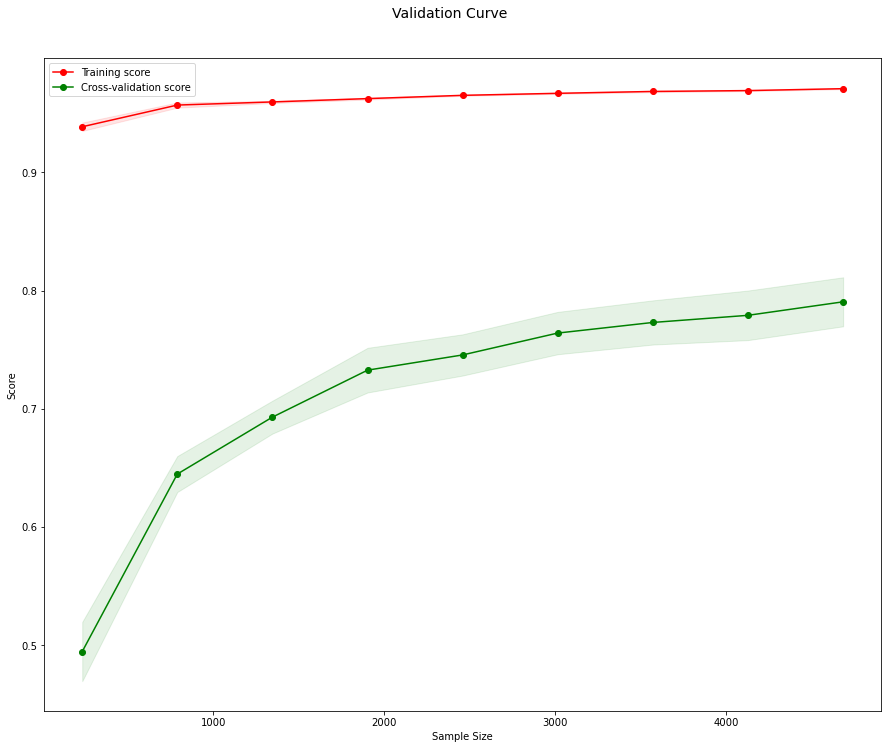

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(15,12))
axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1,
                  color="r")
axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1,
                  color="g")
axes.legend()
# axes.set_ylim(0.4, 1)
plt.suptitle('Validation Curve', fontsize=14, y=0.94)
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')

#### Validation Curve

In [56]:
from sklearn.model_selection import validation_curve

param_range=np.arange(10, 50, 10)
param_name='n_estimators'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), 
                                              X_train, y_train, 
                                              param_name=param_name, 
                                              param_range=param_range, 
                                              cv=10)

In [57]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

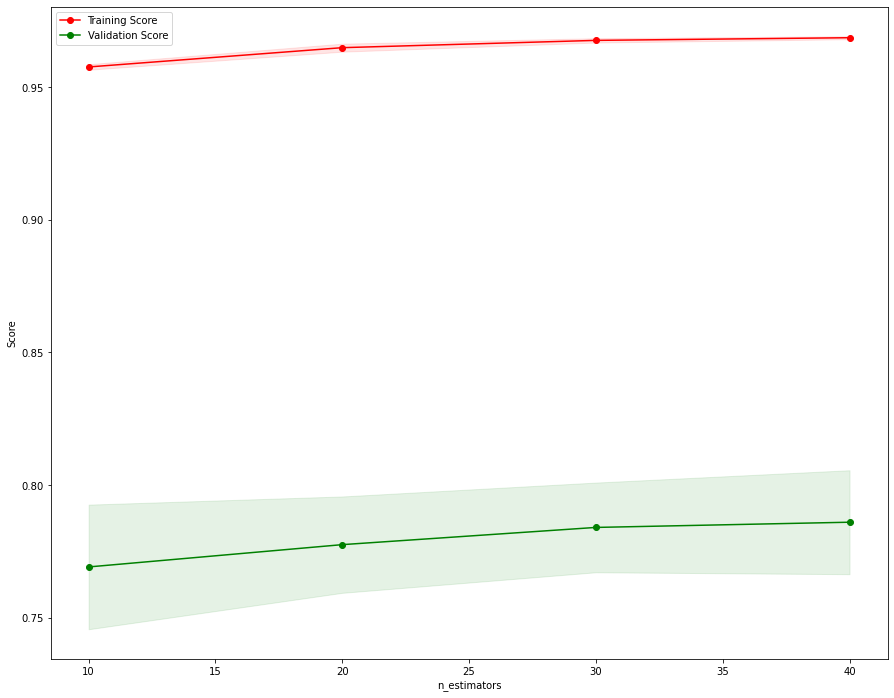

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(15,12))
axes.plot(param_range, train_scores_mean, 'o-', label='Training Score', color='red')
axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1,
                  color="r")
axes.plot(param_range,
          valid_scores_mean,
          'o-',
          label='Validation Score',
          color='green')
axes.fill_between(param_range,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  alpha=0.1,
                  color="green")
axes.legend()
# axes.set_ylim(0.8, 1)
axes.set_xlabel(param_name)
axes.set_ylabel('Score')

#### Model Tunning 

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# create parameter searching grid
param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(2, 6),
                       'max_depth': sp_randint(3, 20),
                       'bootstrap': [True, False]}

# create grid seach cross-validation 
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

# fit the model at each grid point and keeping track of the scores along the way
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276B43D7E80>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276B43E6250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000276B4451190>},
                   scoring='r2')

In [60]:
random_search.best_score_

0.8015462344264874

In [61]:
random_search.best_params_ 

{'bootstrap': False, 'max_depth': 18, 'max_features': 2, 'n_estimators': 142}

#### Model Evaluation on Dataset Test

In [62]:
# use best estimator as our model
model = random_search.best_estimator_

# training model
model.fit(X_train, y_train)

# predict model performance
y_pred_test = model.predict(X_test)

Text(0.8, 1, 'R² = 0.82')

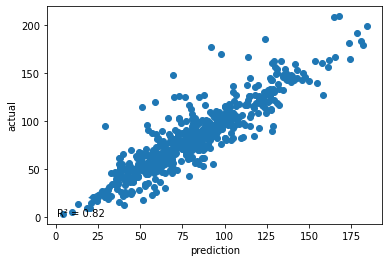

In [63]:
plt.scatter(y_pred_test, y_test)
plt.plot([20, 80], [20, 80])
plt.xlabel('prediction')
plt.ylabel('actual')
r_squared = 0.8245442693362508
plt.text(0.8, 1, 'R\u00B2 = %0.2f' % r_squared)

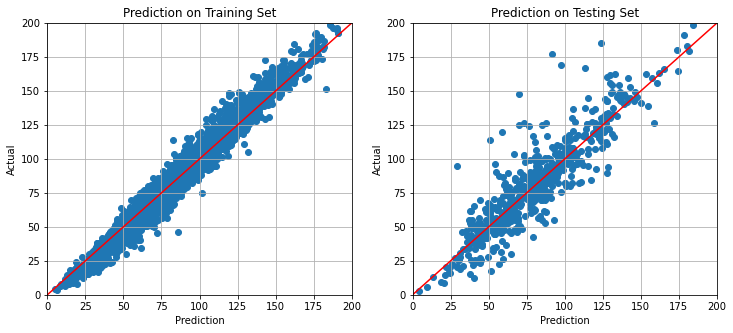

In [64]:
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax_1.set_title('Prediction on Training Set')
ax_1.scatter(y_pred_train, y_train)
ax_1.set_xlim(0,200)
ax_1.set_ylim(0,200)
ax_1.set_xlabel('Prediction')
ax_1.set_ylabel('Actual')
ax_1.plot([0,200], [0,200], color='red')
ax_1.grid()

ax_2.set_title('Prediction on Testing Set')
ax_2.scatter(y_pred_test, y_test)
ax_2.set_xlim(0,200)
ax_2.set_ylim(0,200)
ax_2.set_xlabel('Prediction')
ax_2.set_ylabel('Actual')
ax_2.plot([0,200], [0,200], color='red')
ax_2.grid()

plt.show()

Berdasarkan grafik di atas, hubungan Data Prediksi dan Data Aktual memiliki korelasi yang hampir linear. Hal ini membuktikan bahwa data prediksi hampir mendekati data aktual dan model yang dibuat cukup bagus.

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.8089196240089385

In [66]:
from sklearn.metrics import r2_score
r2_score(y_pred_train, y_train)

0.9671064435844403

### Model Inspection 
#### Permutation Feature Important

In [67]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model,
                           X_test,
                           y_test,
                           n_repeats=30)

In [68]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

FORMATION	0.295 +/- 0.025
TMD     	0.278 +/- 0.014
WOB     	0.156 +/- 0.014
SPP     	0.141 +/- 0.013
MW IN   	0.138 +/- 0.010
FR      	0.128 +/- 0.010
RPM     	0.102 +/- 0.009
TQ      	0.087 +/- 0.008


In [69]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([0.29497006, 0.277987  , 0.15577639, 0.1276939 , 0.14135676,
       0.10236696, 0.08660985, 0.13773339])

In [70]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([6, 5, 3, 7, 4, 2, 1, 0], dtype=int64)

[Text(0, 0, 'TQ'),
 Text(0, 1, 'RPM'),
 Text(0, 2, 'FR '),
 Text(0, 3, 'MW IN'),
 Text(0, 4, 'SPP'),
 Text(0, 5, 'WOB'),
 Text(0, 6, 'TMD'),
 Text(0, 7, 'FORMATION')]

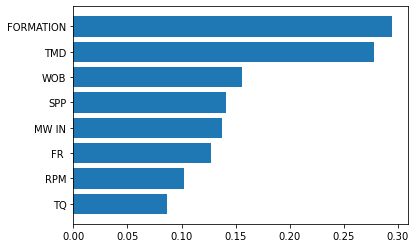

In [71]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

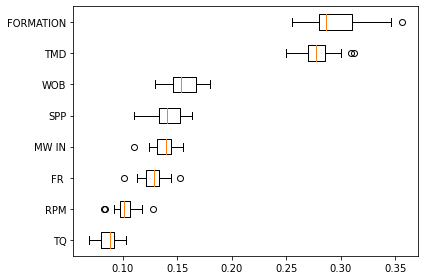

In [72]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

#### One-Way Partial Dependence 


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = ['FORMATION','TMD','SPP', 'WOB', 'TQ','RPM','SPP']
n_features = len(features)
_, ax = plt.subplots(ncols=n_features, figsize=(15,10))
display = PartialDependenceDisplay.from_estimator(model, 
                                                  pd.DataFrame(X_test, columns=X.columns), 
                                                  features,
                                                  kind="both",
                                                  subsample=50,
                                                  n_jobs=3,
                                                  grid_resolution=20,
                                                  random_state=0,
                                                  ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
                                                  pd_line_kw={"color": "tab:orange", "linestyle": "--"},
                                                  ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.5)

#### Two Way Partial Dependence 


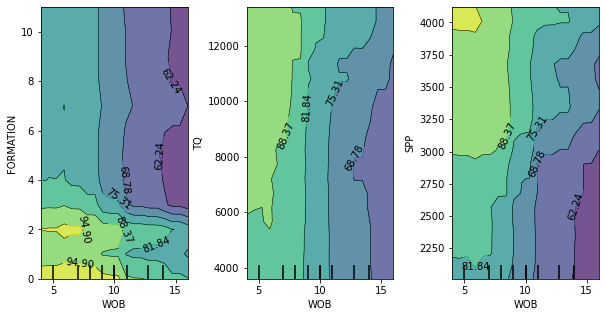

In [74]:
from sklearn.inspection import PartialDependenceDisplay

# ['porosity', 'matrixperm', 'acousticimpedance', 'brittlenessratio', 'toc', 'vitrinitereflectance']
features = [('WOB','FORMATION'),('WOB','TQ'), ('WOB','SPP')]
n_features = len(features)
_, ax = plt.subplots(ncols=n_features, figsize=(10, 5))
display = PartialDependenceDisplay.from_estimator(model, 
                                                  pd.DataFrame(X_test, columns=X.columns), 
                                                  features,
                                                  kind="average",
                                                  subsample=50,
                                                  n_jobs=3,
                                                  grid_resolution=20,
                                                  random_state=0,
                                                  ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.5)

### Test Model To Blind Data 

In [75]:
test_well = blind1
test_well

FORMATION   TMD  WOB    FR    SPP  RPM     TQ   MW IN    ROP
0     SENONIAN ANHYDRITIC   451    2  801.7  2320  100   2412  10.280   37.2
1     SENONIAN ANHYDRITIC   452    3  801.6  2323  131   3301  10.280   59.7
2     SENONIAN ANHYDRITIC   453    6  801.5  2327  130   5200  10.280  108.8
3     SENONIAN ANHYDRITIC   454    5  766.5  1887  136   4080  10.283  128.4
4     SENONIAN ANHYDRITIC   455    6  757.4  1778  158   6754  10.284  104.9
5     SENONIAN ANHYDRITIC   456    6  757.6  1781  158   7091  10.283  116.3
6     SENONIAN ANHYDRITIC   457    7  757.4  1780  164   5795  10.283   83.9
7     SENONIAN ANHYDRITIC   458    7  757.7  1785  169   5773  10.283   89.5
8     SENONIAN ANHYDRITIC   459    7  757.8  1784  173   5271  10.283   80.1
9     SENONIAN ANHYDRITIC   460    8  757.7  1788  177   5819  10.283   74.0
10    SENONIAN ANHYDRITIC   461    7  758.2  1790  177   4860  10.283   97.5
11    SENONIAN ANHYDRITIC   462   11  757.9  1785  184   5989  10.283   68.7
12    SENONIAN ANHYDRITIC   463   10  757.9  1785  184   6014  10.283   68.2
13    SENONIAN ANHYDRITIC   464    9  758.4  1786  170   5773  10.282   79.0
14    SENONIAN ANHYDRITIC   465   10  758.3  1792  153   6487  10.282   81.5
15    SENONIAN ANHYDRITIC   466   11  757.2  1901  154   4765  10.282   64.0
16    SENONIAN ANHYDRITIC   467    9  758.2  1791  153   4850  10.282   73.2
17    SENONIAN ANHYDRITIC   468    9  758.3  1791  149   5277  10.282   81.7
18    SENONIAN ANHYDRITIC   469    7  758.5  1792  149   5464  10.282   85.2
19    SENONIAN ANHYDRITIC   470    9  758.7  1794  148   6051  10.282   84.4
20    SENONIAN ANHYDRITIC   471   10  758.7  1793  148   6128  10.282   74.2
21    SENONIAN ANHYDRITIC   472    6  758.6  1796  149   4582  10.102   82.2
22    SENONIAN ANHYDRITIC   473    5  759.0  1800  140   4022  10.267   81.6
23    SENONIAN ANHYDRITIC   474    7  764.1  1825  128   3516  10.160   61.7
24    SENONIAN ANHYDRITIC   475   11  764.3  1850  135   4771  10.152   71.4
25    SENONIAN ANHYDRITIC   476   12  764.4  1869  140   5708  10.143   87.4
26    SENONIAN ANHYDRITIC   477   12  764.3  1888  141   4353  10.144   66.0
27    SENONIAN ANHYDRITIC   478   11  764.8  1943  141   4195  10.144   76.2
28    SENONIAN ANHYDRITIC   479   11  765.2  1939  142   4410  10.136  104.1
29    SENONIAN ANHYDRITIC   480   11  765.2  2035  143   4388  10.132  118.7
30    SENONIAN ANHYDRITIC   481   10  764.9  2040  143   4555  10.128  124.1
31    SENONIAN ANHYDRITIC   482   12  765.3  2042  144   3547  10.126   99.3
32    SENONIAN ANHYDRITIC   483   11  765.4  2045  144   2662  10.126   96.5
33    SENONIAN ANHYDRITIC   484   13  765.5  2069  149   3700  10.131   95.7
34    SENONIAN ANHYDRITIC   485   12  765.8  2050  151   4170  10.134   99.3
35    SENONIAN ANHYDRITIC   486   10  766.1  2048  151   3282  10.141   92.0
36    SENONIAN ANHYDRITIC   487   13  766.5  2051  151   4000  10.145   98.4
37    SENONIAN ANHYDRITIC   488   12  766.2  2049  151   4422  10.148   63.1
38    SENONIAN ANHYDRITIC   489    8  766.6  2050  151   3970  10.155   94.9
39    SENONIAN ANHYDRITIC   490   10  766.8  2051  151   5216  10.161   91.1
40    SENONIAN ANHYDRITIC   491   11  766.9  2052  151   5360  10.167   92.6
41    SENONIAN ANHYDRITIC   492    9  767.5  2056  151   5166  10.172   91.9
42    SENONIAN ANHYDRITIC   493   10  767.2  2055  151   5452  10.175   88.0
43    SENONIAN ANHYDRITIC   494   12  767.3  2052  151   5232  10.176   89.5
44    SENONIAN ANHYDRITIC   495    9  764.5  2039  151   4272  10.173   76.4
45    SENONIAN ANHYDRITIC   496   12  741.2  1923  151   4581  10.173   62.5
46    SENONIAN ANHYDRITIC   497   10  715.8  1803  151   4408  10.171   52.6
47    SENONIAN ANHYDRITIC   498    5  707.1  1758  151   4007  10.178   87.3
48    SENONIAN ANHYDRITIC   499    8  681.0  1658  151   4658  10.187   81.2
49    SENONIAN ANHYDRITIC   500   11  636.7  1435  152   3040  10.191   48.5
50    SENONIAN ANHYDRITIC   501    8  651.6  1504  151   4191  10.199   68.9
51    SENONI

In [76]:
test_well["FORMATION"] = Lenc.fit_transform(test_well["FORMATION"])

In [77]:
test_well

FORMATION   TMD  WOB    FR    SPP  RPM     TQ   MW IN    ROP
0             8   451    2  801.7  2320  100   2412  10.280   37.2
1             8   452    3  801.6  2323  131   3301  10.280   59.7
2             8   453    6  801.5  2327  130   5200  10.280  108.8
3             8   454    5  766.5  1887  136   4080  10.283  128.4
4             8   455    6  757.4  1778  158   6754  10.284  104.9
5             8   456    6  757.6  1781  158   7091  10.283  116.3
6             8   457    7  757.4  1780  164   5795  10.283   83.9
7             8   458    7  757.7  1785  169   5773  10.283   89.5
8             8   459    7  757.8  1784  173   5271  10.283   80.1
9             8   460    8  757.7  1788  177   5819  10.283   74.0
10            8   461    7  758.2  1790  177   4860  10.283   97.5
11            8   462   11  757.9  1785  184   5989  10.283   68.7
12            8   463   10  757.9  1785  184   6014  10.283   68.2
13            8   464    9  758.4  1786  170   5773  10.282   79.0
14            8   465   10  758.3  1792  153   6487  10.282   81.5
15            8   466   11  757.2  1901  154   4765  10.282   64.0
16            8   467    9  758.2  1791  153   4850  10.282   73.2
17            8   468    9  758.3  1791  149   5277  10.282   81.7
18            8   469    7  758.5  1792  149   5464  10.282   85.2
19            8   470    9  758.7  1794  148   6051  10.282   84.4
20            8   471   10  758.7  1793  148   6128  10.282   74.2
21            8   472    6  758.6  1796  149   4582  10.102   82.2
22            8   473    5  759.0  1800  140   4022  10.267   81.6
23            8   474    7  764.1  1825  128   3516  10.160   61.7
24            8   475   11  764.3  1850  135   4771  10.152   71.4
25            8   476   12  764.4  1869  140   5708  10.143   87.4
26            8   477   12  764.3  1888  141   4353  10.144   66.0
27            8   478   11  764.8  1943  141   4195  10.144   76.2
28            8   479   11  765.2  1939  142   4410  10.136  104.1
29            8   480   11  765.2  2035  143   4388  10.132  118.7
30            8   481   10  764.9  2040  143   4555  10.128  124.1
31            8   482   12  765.3  2042  144   3547  10.126   99.3
32            8   483   11  765.4  2045  144   2662  10.126   96.5
33            8   484   13  765.5  2069  149   3700  10.131   95.7
34            8   485   12  765.8  2050  151   4170  10.134   99.3
35            8   486   10  766.1  2048  151   3282  10.141   92.0
36            8   487   13  766.5  2051  151   4000  10.145   98.4
37            8   488   12  766.2  2049  151   4422  10.148   63.1
38            8   489    8  766.6  2050  151   3970  10.155   94.9
39            8   490   10  766.8  2051  151   5216  10.161   91.1
40            8   491   11  766.9  2052  151   5360  10.167   92.6
41            8   492    9  767.5  2056  151   5166  10.172   91.9
42            8   493   10  767.2  2055  151   5452  10.175   88.0
43            8   494   12  767.3  2052  151   5232  10.176   89.5
44            8   495    9  764.5  2039  151   4272  10.173   76.4
45            8   496   12  741.2  1923  151   4581  10.173   62.5
46            8   497   10  715.8  1803  151   4408  10.171   52.6
47            8   498    5  707.1  1758  151   4007  10.178   87.3
48            8   499    8  681.0  1658  151   4658  10.187   81.2
49            8   500   11  636.7  1435  152   3040  10.191   48.5
50            8   501    8  651.6  1504  151   4191  10.199   68.9
51            8   502    8  669.9  1646  126   5066  10.235   56.1
52            8   503   12  705.8  1920  148   5885  10.280   59.5
53            8   504   11  705.8  1922  151   5579  10.287   63.2
54            8   505   10  706.4  1928  151   3816  10.294   95.8
55            8   506   11  706.2  1931  151   4471  10.297   94.0
56            8   507   10  706.5  1936  151   3886  10.298   88.0
57            8   508   13  707.0  1938  151   5523  10.300   76.6
58            8   509   11  707.1  1942  151   5066  

In [78]:
# Define the test data
x_6 = test_well.drop(['ROP'], axis=1)
y_6 = test_well['ROP']

y_6_pred = model.predict(x_6)

from sklearn.metrics import mean_squared_error
print('R2 Score:', r2_score(y_6, y_6_pred))
print('RMSE:', np.mean(mean_squared_error(y_6, y_6_pred)))

R2 Score: 0.22760823195434776
RMSE: 1336.6131399846727


In [79]:
test_well_1 = blind2
blind2.shape

(452, 9)

In [80]:
test_well_1["FORMATION"] = Lenc.fit_transform(test_well_1["FORMATION"])

In [ ]:
# Define the test data
x_1 = test_well_1.drop(['ROP'], axis=1)
y_1 = test_well_1['ROP']

y_1_pred = model.predict(x_1)

# Plot the Prediction vs Actual

from sklearn.metrics import mean_squared_error
print('R2 Score:', r2_score(y_1, y_1_pred))
print('RMSE:', np.mean(mean_squared_error(y_1, y_1_pred)))

In [ ]:
parameters = ['FORMATION', 'TMD','WOB', 'FR ', 'SPP', 'RPM', 'TQ', 'MW IN']
result_ROP_1 = model.predict(test_well[parameters])
result_ROP_2 = model.predict(test_well_1[parameters])

fig, [ax_1, ax_2] = plt.subplots(ncols=2, nrows=1, figsize=(10,15))
fig.suptitle('ROP Prediction Result', y=0.93, fontsize=16)

ax_1.set_title('Blind Test on UP-5 Well')
ax_1.plot(test_well['ROP'], test_well['TMD'], label='Measured ROP', linewidth=0.8)
ax_1.plot(result_ROP_1, test_well['TMD'], label='Predicted ROP', linewidth=0.8)
ax_1.set_xlabel('ROP')
ax_1.set_ylabel('TMD')
ax_1.set_ylim(0)
ax_1.invert_yaxis()
ax_1.set_xlim(0, 250)
ax_1.minorticks_on()
ax_1.grid(visible=True, which='both', axis='y')
ax_1.grid(visible=True, which='major', axis='x')
ax_1.legend()

ax_2.set_title('Prediction on UP-6 Well')
ax_2.plot(test_well_1['ROP'], test_well_1['TMD'], label='Measured ROP', linewidth=0.8)
ax_2.plot(result_ROP_2, test_well_1['TMD'], label='Predicted ROP', linewidth=0.8)
ax_2.set_xlabel('ROP')
ax_2.set_ylabel('TMD')
ax_2.set_ylim(0)
ax_2.invert_yaxis()
ax_2.set_xlim(0, 250)
ax_2.minorticks_on()
ax_2.grid(visible=True, which='both', axis='y')
ax_2.grid(visible=True, which='major', axis='x')
ax_2.legend()

plt.show()